#  Requêter via des API avec Python




<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=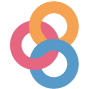)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04c_API_TP.ipynb)

# Introduction : Qu'est-ce qu'une API ?  

## Définition

Pour expliquer le principe d'une API, je vais reprendre le début de 
la fiche dédiée dans la documentation collaborative
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
> 
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html)

Les API présentent de multiples avantages :

> * Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> * Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> * Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> * Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html)

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
> 
> * soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> * soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c'est-à-dire un 
compte utilisateur afin de pouvoir accéder aux données. 
Dans un premier temps, 
nous regarderons exclusivement les API ouvertes sans restriction d'accès.  
Certains exercices et exemples permettront néanmoins d'essayer des API
avec restrictions d'accès. 

# Requêter une API

## Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
> 
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API. 
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j'emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)):

* Le __point d’entrée__ d’un service offert par une API se présente sous la forme d’une URL (adresse web). Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
l'URL à utiliser pour obtenir des informations sur un produit particulier (l'identifiant `737628064502`) estg https://world.openfoodfacts.org/api/v0/product/737628064502.json
* Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation. 
* Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats JSON ou XML (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).
* Du fait de la dimension hiérarchique des formats JSON ou XML, le résultat n’est pas toujours facile à récupérer mais
`python` propose d'excellents outils pour cela (meilleurs que ceux de `R`). Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API. Dans certains cas, des packages spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[pynsee](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)
propose des options qui seront retranscrites automatiquement dans l'URL de 
requête pour faciliter le travail sur les données Insee. 

## Exemple avec l'API de la Banque Mondiale

Avec l'API de la Banque mondiale, voici comme s'écrit une requête : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC

1. Le point d'entrée est l'URL <http://api.worldbank.org/v2>
2. Un filtre est appliqué sur les pays (`countries?`) afin de ne conserver
que celles telles que `incomeLevel=LMC` (*"Lower middle income"*)

En cliquant sur le lien, le site renvoie des données en XML,
qui ressemblent pas mal à ce qu'on a vu plus tôt avec le scraping : une structure avec des balises qui s'ouvrent et qui se ferment.

Pour obtenir la même information en `Python`, il faut revenir aux fondamentaux : on va avoir besoin du module `requests`. Suivant les API, nous avons soit besoin de rien de plus si nous parvenons directement à obtenir un json, soit devoir utiliser un *parser* comme `BeautifulSoup` dans le cas contraire. 

Avec l'API de la banque mondiale, on va utiliser le module `requests` et sa méthode `get` : on lui donne l'url de l'API qui nous intéresse, on lui demande d'en faire un json et le tour est *en apparence* joué.


In [ ]:
import requests
r = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC')

Prenons par exemple les 1000 premiers caractères du résultat:


In [ ]:
print(r.content[:1000])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'content' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

Quand on regarde de plus près, on voit que les informations suivantes apparaissent: 
 
* Code du pays
* Nom du pays
* Région
* Classification en termes de revenus
* Les types de prêt pour ces pays
* La capitale
* Longitude
* Latitude

Le format XML est fortement balisé, ce qui n'est pas très pratique. 
En utilisant désormais un autre URL, on obtient un JSON, plus pratique pour travailler : 

> http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json


In [ ]:
import requests
import pandas as pd

r = requests.get('http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json')

A nouveau, les premiers caractères sont les suivants:


In [ ]:
print(r.content[:1000])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'content' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

Cela ressemble déjà plus à un dictionnaire `Python`[^1].

[^1]: Le JSON est un format très apprécié dans le domaine du *big data*
car il permet de stocker de manière intelligente des données
de structures diverses. Il 
s'agit d'un des formats privilégiés du paradigme No-SQL pour lequel
cet [excellent cours](http://b3d.bdpedia.fr/) propose plus de détails

Ici, il n'est même pas nécessaire en première approche 
d'utiliser le package `json`, l'information
étant déjà tabulée dans l'écho renvoyé (on a la même information pour tous les pays):


In [ ]:
wb = r.json()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'json' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

In [ ]:
wb = pd.json_normalize(wb[1])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
wb.head(5)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Cependant, si on regarde la dimension de l'objet obtenu, on obtient un
chiffre rond (50 lignes). Ceci est suspect et un petit tour dans la
documentation de l'API nous apprendrait que c'est le nombre maximal de 
retour possible. Il faut donc faire attention à la documentation et 
ajouter un paramètre `page=2` pour rattraper les derniers échos: 


In [ ]:
wb2 = pd.json_normalize(
    requests.get("http://api.worldbank.org/v2/countries?incomeLevel=LMC&format=json&page=2").json()[1]
    )
pd.concat([wb, wb2])

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'wb' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Si on regarde l'information présente dans le DataFrame, on voit qu'elle se
présente sous forme `lendingType.value`. C'est parce que `pandas` a 
concaténé les différents niveaux de notre dictionnaire. Si on désire
s'en assurer, on peut regarder sur un exemple:


In [ ]:
r.json()[1][0]['incomeLevel']['value'] == wb.loc[0, 'incomeLevel.value'] 

```
## Error in py_call_impl(callable, dots$args, dots$keywords): RuntimeError: Evaluation error: object 'json' not found.
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/usr/local/lib/R/site-library/reticulate/python/rpytools/call.py", line 21, in python_function
##     raise RuntimeError(res[kErrorKey])
```

## Un catalogue incomplet d'API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux. 

Pour en citer quelques-unes très connues : 

- Twitter <i class="fab fa-twitter"></i> : https://dev.twitter.com/rest/public
- Facebook <i class="fab fa-facebook"></i> : https://developers.facebook.com/
- Instagram <i class="fab fa-instagram"></i> : https://www.instagram.com/developer/
- Spotify <i class="fab fa-spotify"></i> : https://developer.spotify.com/web-api/

Cependant, il est intéressant de ne pas se restreindre à celles-ci. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition 
leurs données sous forme d'API

- Pole Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
- SNCF : https://data.sncf.com/api
- Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589
- Insee: https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/master/pynsee)

# L'API DVF : accéder à des données de transactions immobilières simplement

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages...) réalisées durant les 5 dernières années

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>

Ce site est très complet quand il s'agit de connaître le prix moyen au mètre
carré d'un quartier ou de comparer des régions entre elles. 
L'API DVF permet d'aller plus loin afin de récupérer les résultats dans 
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)


:one: 
Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
Afficher les clés du JSON et en déduire le nombre de transactions répertoriées. 


In [ ]:
# Question 1
data_immo = requests.get("http://api.cquest.org/dvf?code_commune=29168").json()
data_immo.keys()

```
## dict_keys(['source', 'derniere_maj', 'licence', 'nb_resultats', 'resultats'])
```

In [ ]:
ventes = pd.json_normalize(data_immo["resultats"])

:two: 
N'afficher que les transactions portant sur des maisons. Le résultat devrait
ressembler au DataFrame suivant:


In [ ]:
# Question 2
maisons = requests.get("http://api.cquest.org/dvf?code_commune=29168&type_local=Maison").json()
pd.json_normalize(maisons["resultats"])

```
##     code_service_ch reference_document  ... geom.type        geom.coordinates
## 0              None               None  ...     Point  [-4.705626, 48.042047]
## 1              None               None  ...     Point  [-4.709215, 48.038356]
## 2              None               None  ...     Point  [-4.709152, 48.038782]
## 3              None               None  ...     Point  [-4.708496, 48.038467]
## 4              None               None  ...     Point  [-4.708192, 48.038626]
## ..              ...                ...  ...       ...                     ...
## 129            None               None  ...     Point   [-4.70207, 48.039692]
## 130            None               None  ...     Point   [-4.699823, 48.03942]
## 131            None               None  ...     Point  [-4.700808, 48.038956]
## 132            None               None  ...     Point  [-4.700004, 48.037184]
## 133            None               None  ...     Point  [-4.712316, 48.037312]
## 
## [134 rows x 47 columns]
```

:three: Utiliser l'[API geo](https://api.gouv.fr/documentation/api-geo) pour
récupérer le découpage communal de la ville de Plogoff


In [ ]:
import geopandas as gpd
plgf = gpd.read_file("https://geo.api.gouv.fr/communes/29168?fields=nom,code,codesPostaux,codeDepartement,codeRegion,population&format=geojson&geometry=contour")

:four:
Représenter l'histogramme des prix de vente


In [ ]:
p = ventes["valeur_fonciere"].plot(kind = "hist")
p

![plot of chunk unnamed-chunk-12](unnamed-chunk-12-1.png)




N'hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple

:five: 
On va faire une carte des ventes en affichant le prix de l'achat.

Supposons que le DataFrame des ventes s'appelle `ventes`. Il faut d'abord le
convertir
en objet `geopandas`. 


In [ ]:
ventes = ventes.dropna(subset = ['lat','lon'])
ventes = gpd.GeoDataFrame(ventes, geometry=gpd.points_from_xy(ventes.lon, ventes.lat))
ventes

```
##     code_service_ch reference_document  ... geom                   geometry
## 0              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 1              None               None  ...  NaN  POINT (-4.71797 48.03781)
## 2              None               None  ...  NaN  POINT (-4.70949 48.04230)
## 3              None               None  ...  NaN  POINT (-4.70696 48.04313)
## 4              None               None  ...  NaN  POINT (-4.70555 48.04223)
## ..              ...                ...  ...  ...                        ...
## 434            None               None  ...  NaN  POINT (-4.71243 48.03708)
## 435            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 436            None               None  ...  NaN  POINT (-4.71232 48.03731)
## 437            None               None  ...  NaN  POINT (-4.71186 48.03727)
## 438            None               None  ...  NaN  POINT (-4.71601 48.03396)
## 
## [431 rows x 49 columns]
```

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l'exécuter)


In [ ]:
import folium

center = ventes[['lat', 'lon']].mean().values.tolist()
sw = ventes[['lat', 'lon']].min().values.tolist()
ne = ventes[['lat', 'lon']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(ventes)):
    folium.Marker([ventes.iloc[i]['lat'], ventes.iloc[i]['lon']], popup=ventes.iloc[i]['valeur_fonciere']).add_to(m) #bug du paramètre popup

```
## <folium.map.Marker object at 0x7f75a1394e50>
## <folium.map.Marker object at 0x7f75a1394f70>
## <folium.map.Marker object at 0x7f75a136c2e0>
## <folium.map.Marker object at 0x7f75a0c3ac40>
## <folium.map.Marker object at 0x7f75a0c3aca0>
## <folium.map.Marker object at 0x7f75a0c3adf0>
## <folium.map.Marker object at 0x7f75a0c3ad00>
## <folium.map.Marker object at 0x7f75a0c3a220>
## <folium.map.Marker object at 0x7f75a0c3af40>
## <folium.map.Marker object at 0x7f759a215760>
## <folium.map.Marker object at 0x7f75a0c44490>
## <folium.map.Marker object at 0x7f75a0c44610>
## <folium.map.Marker object at 0x7f75a0c44910>
## <folium.map.Marker object at 0x7f75a0c445e0>
## <folium.map.Marker object at 0x7f75a0c441f0>
## <folium.map.Marker object at 0x7f75a0c44520>
## <folium.map.Marker object at 0x7f75a0c44880>
## <folium.map.Marker object at 0x7f75a0c44820>
## <folium.map.Marker object at 0x7f759a1d6f40>
## <folium.map.Marker object at 0x7f75a0c4d0d0>
## <folium.map.Marker object at 0x7f75a0c4d1f0>
## <folium.map.Marker object at 0x7f75a0c4d310>
## <folium.map.Marker object at 0x7f75a0c4d430>
## <folium.map.Marker object at 0x7f75a0c4d550>
## <folium.map.Marker object at 0x7f75a0c4d670>
## <folium.map.Marker object at 0x7f75a0c4d790>
## <folium.map.Marker object at 0x7f75a0c4d8b0>
## <folium.map.Marker object at 0x7f75a0c4d9d0>
## <folium.map.Marker object at 0x7f75a0c4daf0>
## <folium.map.Marker object at 0x7f75a0c4dc10>
## <folium.map.Marker object at 0x7f75a0c4dd30>
## <folium.map.Marker object at 0x7f75a0c4de50>
## <folium.map.Marker object at 0x7f75a0c4dfd0>
## <folium.map.Marker object at 0x7f75a0ace0d0>
## <folium.map.Marker object at 0x7f75a0ace1f0>
## <folium.map.Marker object at 0x7f75a0ace310>
## <folium.map.Marker object at 0x7f75a0ace430>
## <folium.map.Marker object at 0x7f75a0ace550>
## <folium.map.Marker object at 0x7f75a0ace670>
## <folium.map.Marker object at 0x7f75a0ace790>
## <folium.map.Marker object at 0x7f75a0ace8b0>
## <folium.map.Marker object at 0x7f75a0ace9d0>
## <folium.map.Marker object at 0x7f75a0aceaf0>
## <folium.map.Marker object at 0x7f75a0acec10>
## <folium.map.Marker object at 0x7f75a0aced30>
## <folium.map.Marker object at 0x7f75a0acee50>
## <folium.map.Marker object at 0x7f75a0acefd0>
## <folium.map.Marker object at 0x7f75a0ada0d0>
## <folium.map.Marker object at 0x7f75a0ada1f0>
## <folium.map.Marker object at 0x7f75a0ada310>
## <folium.map.Marker object at 0x7f75a0ada430>
## <folium.map.Marker object at 0x7f75a0ada550>
## <folium.map.Marker object at 0x7f75a0ada670>
## <folium.map.Marker object at 0x7f75a0ada790>
## <folium.map.Marker object at 0x7f75a0ada8b0>
## <folium.map.Marker object at 0x7f75a0ada9d0>
## <folium.map.Marker object at 0x7f75a0adaaf0>
## <folium.map.Marker object at 0x7f75a0adac10>
## <folium.map.Marker object at 0x7f75a0adad30>
## <folium.map.Marker object at 0x7f75a0adae50>
## <folium.map.Marker object at 0x7f75a0adafd0>
## <folium.map.Marker object at 0x7f75a0ae90d0>
## <folium.map.Marker object at 0x7f75a0ae91f0>
## <folium.map.Marker object at 0x7f75a0ae9310>
## <folium.map.Marker object at 0x7f75a0ae9430>
## <folium.map.Marker object at 0x7f75a0ae9550>
## <folium.map.Marker object at 0x7f75a0ae9670>
## <folium.map.Marker object at 0x7f75a0ae9790>
## <folium.map.Marker object at 0x7f75a0ae98b0>
## <folium.map.Marker object at 0x7f75a0ae99d0>
## <folium.map.Marker object at 0x7f75a0ae9af0>
## <folium.map.Marker object at 0x7f75a0ae9c10>
## <folium.map.Marker object at 0x7f75a0ae9d30>
## <folium.map.Marker object at 0x7f75a0ae9e50>
## <folium.map.Marker object at 0x7f75a0ae9fd0>
## <folium.map.Marker object at 0x7f75a0af80d0>
## <folium.map.Marker object at 0x7f75a0af81f0>
## <folium.map.Marker object at 0x7f75a0af8310>
## <folium.map.Marker object at 0x7f75a0af8430>
## <folium.map.Marker object at 0x7f75a0af8550>
## <folium.map.Marker object at 0x7f75a0af8670>
## <folium.map.Marker object at 0x7f75a0af8790>
## <folium.map.Marker object at 0x7f75a0af88b0>
## <folium.map.Marker object at 0x7f75a0af89d0>
## <folium.map.Marker object at 0x7f75a0af8af0>
## <folium.map.Marker object at 0x7f75a0af8c10>
## <folium.map.Marker object at 0x7f75a0af8d30>
## <folium.map.Marker object at 0x7f75a0af8e50>
## <folium.map.Marker object at 0x7f75a0af8fd0>
## <folium.map.Marker object at 0x7f75a0a390d0>
## <folium.map.Marker object at 0x7f75a0a391f0>
## <folium.map.Marker object at 0x7f75a0a39340>
## <folium.map.Marker object at 0x7f75a0a39460>
## <folium.map.Marker object at 0x7f75a0a39580>
## <folium.map.Marker object at 0x7f75a0a396a0>
## <folium.map.Marker object at 0x7f75a0a397c0>
## <folium.map.Marker object at 0x7f75a0a398e0>
## <folium.map.Marker object at 0x7f75a0a39a00>
## <folium.map.Marker object at 0x7f75a0a39b20>
## <folium.map.Marker object at 0x7f75a0a39c40>
## <folium.map.Marker object at 0x7f75a0a39d60>
## <folium.map.Marker object at 0x7f75a0a39e80>
## <folium.map.Marker object at 0x7f75a0a39250>
## <folium.map.Marker object at 0x7f75a0a47130>
## <folium.map.Marker object at 0x7f75a0a47250>
## <folium.map.Marker object at 0x7f75a0a47370>
## <folium.map.Marker object at 0x7f75a0a47490>
## <folium.map.Marker object at 0x7f75a0a475b0>
## <folium.map.Marker object at 0x7f75a0a476d0>
## <folium.map.Marker object at 0x7f75a0a477f0>
## <folium.map.Marker object at 0x7f75a0a47910>
## <folium.map.Marker object at 0x7f75a0a47a30>
## <folium.map.Marker object at 0x7f75a0a47b50>
## <folium.map.Marker object at 0x7f75a0a47c70>
## <folium.map.Marker object at 0x7f75a0a47d90>
## <folium.map.Marker object at 0x7f75a0a47eb0>
## <folium.map.Marker object at 0x7f75a0a470d0>
## <folium.map.Marker object at 0x7f75a0a56130>
## <folium.map.Marker object at 0x7f75a0a56250>
## <folium.map.Marker object at 0x7f75a0a56370>
## <folium.map.Marker object at 0x7f75a0a56490>
## <folium.map.Marker object at 0x7f75a0a565b0>
## <folium.map.Marker object at 0x7f75a0a566d0>
## <folium.map.Marker object at 0x7f75a0a567f0>
## <folium.map.Marker object at 0x7f75a0a56910>
## <folium.map.Marker object at 0x7f75a0a56a30>
## <folium.map.Marker object at 0x7f75a0a56b50>
## <folium.map.Marker object at 0x7f75a0a56c70>
## <folium.map.Marker object at 0x7f75a0a56d90>
## <folium.map.Marker object at 0x7f75a0a56eb0>
## <folium.map.Marker object at 0x7f75a0a560d0>
## <folium.map.Marker object at 0x7f75a0a64130>
## <folium.map.Marker object at 0x7f75a0a64250>
## <folium.map.Marker object at 0x7f75a0a64370>
## <folium.map.Marker object at 0x7f75a0a64490>
## <folium.map.Marker object at 0x7f75a0a645b0>
## <folium.map.Marker object at 0x7f75a0a646d0>
## <folium.map.Marker object at 0x7f75a0a647f0>
## <folium.map.Marker object at 0x7f75a0a64910>
## <folium.map.Marker object at 0x7f75a0a64a30>
## <folium.map.Marker object at 0x7f75a0a64b50>
## <folium.map.Marker object at 0x7f75a0a64c70>
## <folium.map.Marker object at 0x7f75a0a64d90>
## <folium.map.Marker object at 0x7f75a0a64eb0>
## <folium.map.Marker object at 0x7f75a0a64070>
## <folium.map.Marker object at 0x7f75a0a72130>
## <folium.map.Marker object at 0x7f75a0a72250>
## <folium.map.Marker object at 0x7f75a0a72370>
## <folium.map.Marker object at 0x7f75a0a72490>
## <folium.map.Marker object at 0x7f75a0a725b0>
## <folium.map.Marker object at 0x7f75a0a726d0>
## <folium.map.Marker object at 0x7f75a0a727f0>
## <folium.map.Marker object at 0x7f75a0a72910>
## <folium.map.Marker object at 0x7f75a0a72a30>
## <folium.map.Marker object at 0x7f75a0a72b50>
## <folium.map.Marker object at 0x7f75a0a72c70>
## <folium.map.Marker object at 0x7f75a0a72d90>
## <folium.map.Marker object at 0x7f75a0a72eb0>
## <folium.map.Marker object at 0x7f75a0a720d0>
## <folium.map.Marker object at 0x7f75a0882130>
## <folium.map.Marker object at 0x7f75a0882250>
## <folium.map.Marker object at 0x7f75a0882370>
## <folium.map.Marker object at 0x7f75a0882490>
## <folium.map.Marker object at 0x7f75a08825b0>
## <folium.map.Marker object at 0x7f75a08826d0>
## <folium.map.Marker object at 0x7f75a08827f0>
## <folium.map.Marker object at 0x7f75a0882910>
## <folium.map.Marker object at 0x7f75a0882a30>
## <folium.map.Marker object at 0x7f75a0882b50>
## <folium.map.Marker object at 0x7f75a0882c70>
## <folium.map.Marker object at 0x7f75a0882d90>
## <folium.map.Marker object at 0x7f75a0882eb0>
## <folium.map.Marker object at 0x7f75a0882070>
## <folium.map.Marker object at 0x7f75a0891130>
## <folium.map.Marker object at 0x7f75a0891250>
## <folium.map.Marker object at 0x7f75a0891370>
## <folium.map.Marker object at 0x7f75a0891490>
## <folium.map.Marker object at 0x7f75a08915b0>
## <folium.map.Marker object at 0x7f75a08916d0>
## <folium.map.Marker object at 0x7f75a08917f0>
## <folium.map.Marker object at 0x7f75a0891910>
## <folium.map.Marker object at 0x7f75a0891a30>
## <folium.map.Marker object at 0x7f75a0891b50>
## <folium.map.Marker object at 0x7f75a0891c70>
## <folium.map.Marker object at 0x7f75a0891d90>
## <folium.map.Marker object at 0x7f75a0891eb0>
## <folium.map.Marker object at 0x7f75a08910d0>
## <folium.map.Marker object at 0x7f75a089e130>
## <folium.map.Marker object at 0x7f75a089e250>
## <folium.map.Marker object at 0x7f75a089e370>
## <folium.map.Marker object at 0x7f75a089e490>
## <folium.map.Marker object at 0x7f75a089e5b0>
## <folium.map.Marker object at 0x7f75a089e6d0>
## <folium.map.Marker object at 0x7f75a089e7f0>
## <folium.map.Marker object at 0x7f75a089e910>
## <folium.map.Marker object at 0x7f75a089ea30>
## <folium.map.Marker object at 0x7f75a089eb50>
## <folium.map.Marker object at 0x7f75a089ec70>
## <folium.map.Marker object at 0x7f75a089ed90>
## <folium.map.Marker object at 0x7f75a089eeb0>
## <folium.map.Marker object at 0x7f75a089e0d0>
## <folium.map.Marker object at 0x7f75a08ad130>
## <folium.map.Marker object at 0x7f75a08ad250>
## <folium.map.Marker object at 0x7f75a08ad370>
## <folium.map.Marker object at 0x7f75a08ad490>
## <folium.map.Marker object at 0x7f75a08ad5b0>
## <folium.map.Marker object at 0x7f75a08ad6d0>
## <folium.map.Marker object at 0x7f75a08ad7f0>
## <folium.map.Marker object at 0x7f75a08ad910>
## <folium.map.Marker object at 0x7f75a08ada30>
## <folium.map.Marker object at 0x7f75a08adb50>
## <folium.map.Marker object at 0x7f75a08adc70>
## <folium.map.Marker object at 0x7f75a08add90>
## <folium.map.Marker object at 0x7f75a08adeb0>
## <folium.map.Marker object at 0x7f75a08ad0d0>
## <folium.map.Marker object at 0x7f75a083d130>
## <folium.map.Marker object at 0x7f75a083d250>
## <folium.map.Marker object at 0x7f75a083d370>
## <folium.map.Marker object at 0x7f75a083d490>
## <folium.map.Marker object at 0x7f75a083d5b0>
## <folium.map.Marker object at 0x7f75a083d6d0>
## <folium.map.Marker object at 0x7f75a083d7f0>
## <folium.map.Marker object at 0x7f75a083d910>
## <folium.map.Marker object at 0x7f75a083da30>
## <folium.map.Marker object at 0x7f75a083db50>
## <folium.map.Marker object at 0x7f75a083dc70>
## <folium.map.Marker object at 0x7f75a083dd90>
## <folium.map.Marker object at 0x7f75a083deb0>
## <folium.map.Marker object at 0x7f75a083d0d0>
## <folium.map.Marker object at 0x7f75a084b130>
## <folium.map.Marker object at 0x7f75a084b250>
## <folium.map.Marker object at 0x7f75a084b370>
## <folium.map.Marker object at 0x7f75a084b490>
## <folium.map.Marker object at 0x7f75a084b5b0>
## <folium.map.Marker object at 0x7f75a084b6d0>
## <folium.map.Marker object at 0x7f75a084b7f0>
## <folium.map.Marker object at 0x7f75a084b910>
## <folium.map.Marker object at 0x7f75a084ba30>
## <folium.map.Marker object at 0x7f75a084bb50>
## <folium.map.Marker object at 0x7f75a084bc70>
## <folium.map.Marker object at 0x7f75a084bd90>
## <folium.map.Marker object at 0x7f75a084beb0>
## <folium.map.Marker object at 0x7f75a084b0d0>
## <folium.map.Marker object at 0x7f75a0859130>
## <folium.map.Marker object at 0x7f75a0859250>
## <folium.map.Marker object at 0x7f75a0859370>
## <folium.map.Marker object at 0x7f75a0859490>
## <folium.map.Marker object at 0x7f75a08595b0>
## <folium.map.Marker object at 0x7f75a08596d0>
## <folium.map.Marker object at 0x7f75a08597f0>
## <folium.map.Marker object at 0x7f75a0859910>
## <folium.map.Marker object at 0x7f75a0859a30>
## <folium.map.Marker object at 0x7f75a0859b50>
## <folium.map.Marker object at 0x7f75a0859c70>
## <folium.map.Marker object at 0x7f75a0859d90>
## <folium.map.Marker object at 0x7f75a0859eb0>
## <folium.map.Marker object at 0x7f75a08590d0>
## <folium.map.Marker object at 0x7f75a0868130>
## <folium.map.Marker object at 0x7f75a0868250>
## <folium.map.Marker object at 0x7f75a0868370>
## <folium.map.Marker object at 0x7f75a0868490>
## <folium.map.Marker object at 0x7f75a08685b0>
## <folium.map.Marker object at 0x7f75a08686d0>
## <folium.map.Marker object at 0x7f75a08687f0>
## <folium.map.Marker object at 0x7f75a0868910>
## <folium.map.Marker object at 0x7f75a0868a30>
## <folium.map.Marker object at 0x7f75a0868b50>
## <folium.map.Marker object at 0x7f75a0868c70>
## <folium.map.Marker object at 0x7f75a0868d90>
## <folium.map.Marker object at 0x7f75a0868eb0>
## <folium.map.Marker object at 0x7f75a08680d0>
## <folium.map.Marker object at 0x7f75a07f7130>
## <folium.map.Marker object at 0x7f75a07f7250>
## <folium.map.Marker object at 0x7f75a07f73a0>
## <folium.map.Marker object at 0x7f75a07f74c0>
## <folium.map.Marker object at 0x7f75a07f75e0>
## <folium.map.Marker object at 0x7f75a07f7700>
## <folium.map.Marker object at 0x7f75a07f7820>
## <folium.map.Marker object at 0x7f75a07f7940>
## <folium.map.Marker object at 0x7f75a07f7a60>
## <folium.map.Marker object at 0x7f75a07f7b80>
## <folium.map.Marker object at 0x7f75a07f7ca0>
## <folium.map.Marker object at 0x7f75a07f7dc0>
## <folium.map.Marker object at 0x7f75a07f7ee0>
## <folium.map.Marker object at 0x7f75a07f72b0>
## <folium.map.Marker object at 0x7f75a0805160>
## <folium.map.Marker object at 0x7f75a0805280>
## <folium.map.Marker object at 0x7f75a08053a0>
## <folium.map.Marker object at 0x7f75a08054c0>
## <folium.map.Marker object at 0x7f75a08055e0>
## <folium.map.Marker object at 0x7f75a0805700>
## <folium.map.Marker object at 0x7f75a0805820>
## <folium.map.Marker object at 0x7f75a0805940>
## <folium.map.Marker object at 0x7f75a0805a60>
## <folium.map.Marker object at 0x7f75a0805b80>
## <folium.map.Marker object at 0x7f75a0805ca0>
## <folium.map.Marker object at 0x7f75a0805dc0>
## <folium.map.Marker object at 0x7f75a0805ee0>
## <folium.map.Marker object at 0x7f75a0805100>
## <folium.map.Marker object at 0x7f75a0814160>
## <folium.map.Marker object at 0x7f75a0814280>
## <folium.map.Marker object at 0x7f75a08143a0>
## <folium.map.Marker object at 0x7f75a08144c0>
## <folium.map.Marker object at 0x7f75a08145e0>
## <folium.map.Marker object at 0x7f75a0814700>
## <folium.map.Marker object at 0x7f75a0814820>
## <folium.map.Marker object at 0x7f75a0814940>
## <folium.map.Marker object at 0x7f75a0814a60>
## <folium.map.Marker object at 0x7f75a0814b80>
## <folium.map.Marker object at 0x7f75a0814ca0>
## <folium.map.Marker object at 0x7f75a0814dc0>
## <folium.map.Marker object at 0x7f75a0814ee0>
## <folium.map.Marker object at 0x7f75a0814100>
## <folium.map.Marker object at 0x7f75a0823160>
## <folium.map.Marker object at 0x7f75a0823280>
## <folium.map.Marker object at 0x7f75a08233a0>
## <folium.map.Marker object at 0x7f75a08234c0>
## <folium.map.Marker object at 0x7f75a08235e0>
## <folium.map.Marker object at 0x7f75a0823700>
## <folium.map.Marker object at 0x7f75a0823820>
## <folium.map.Marker object at 0x7f75a0823940>
## <folium.map.Marker object at 0x7f75a0823a60>
## <folium.map.Marker object at 0x7f75a0823b80>
## <folium.map.Marker object at 0x7f75a0823ca0>
## <folium.map.Marker object at 0x7f75a0823dc0>
## <folium.map.Marker object at 0x7f75a0823ee0>
## <folium.map.Marker object at 0x7f75a0823040>
## <folium.map.Marker object at 0x7f75a0831160>
## <folium.map.Marker object at 0x7f75a0831280>
## <folium.map.Marker object at 0x7f75a08313a0>
## <folium.map.Marker object at 0x7f75a08314c0>
## <folium.map.Marker object at 0x7f75a08315e0>
## <folium.map.Marker object at 0x7f75a0831700>
## <folium.map.Marker object at 0x7f75a0831820>
## <folium.map.Marker object at 0x7f75a0831940>
## <folium.map.Marker object at 0x7f75a0831a60>
## <folium.map.Marker object at 0x7f75a0831b80>
## <folium.map.Marker object at 0x7f75a0831ca0>
## <folium.map.Marker object at 0x7f75a0831dc0>
## <folium.map.Marker object at 0x7f75a0831ee0>
## <folium.map.Marker object at 0x7f75a0831100>
## <folium.map.Marker object at 0x7f75a07bf160>
## <folium.map.Marker object at 0x7f75a07bf280>
## <folium.map.Marker object at 0x7f75a07bf3a0>
## <folium.map.Marker object at 0x7f75a07bf4c0>
## <folium.map.Marker object at 0x7f75a07bf5e0>
## <folium.map.Marker object at 0x7f75a07bf700>
## <folium.map.Marker object at 0x7f75a07bf820>
## <folium.map.Marker object at 0x7f75a07bf940>
## <folium.map.Marker object at 0x7f75a07bfa60>
## <folium.map.Marker object at 0x7f75a07bfb80>
## <folium.map.Marker object at 0x7f75a07bfca0>
## <folium.map.Marker object at 0x7f75a07bfdc0>
## <folium.map.Marker object at 0x7f75a07bfee0>
## <folium.map.Marker object at 0x7f75a07bf100>
## <folium.map.Marker object at 0x7f75a07ce160>
## <folium.map.Marker object at 0x7f75a07ce280>
## <folium.map.Marker object at 0x7f75a07ce3a0>
## <folium.map.Marker object at 0x7f75a07ce4c0>
## <folium.map.Marker object at 0x7f75a07ce5e0>
## <folium.map.Marker object at 0x7f75a07ce700>
## <folium.map.Marker object at 0x7f75a07ce820>
## <folium.map.Marker object at 0x7f75a07ce940>
## <folium.map.Marker object at 0x7f75a07cea60>
## <folium.map.Marker object at 0x7f75a07ceb80>
## <folium.map.Marker object at 0x7f75a07ceca0>
## <folium.map.Marker object at 0x7f75a07cedc0>
## <folium.map.Marker object at 0x7f75a07ceee0>
## <folium.map.Marker object at 0x7f75a07ce100>
## <folium.map.Marker object at 0x7f75a07dd160>
## <folium.map.Marker object at 0x7f75a07dd280>
## <folium.map.Marker object at 0x7f75a07dd3a0>
## <folium.map.Marker object at 0x7f75a07dd4c0>
## <folium.map.Marker object at 0x7f75a07dd5e0>
## <folium.map.Marker object at 0x7f75a07dd700>
## <folium.map.Marker object at 0x7f75a07dd820>
## <folium.map.Marker object at 0x7f75a07dd940>
## <folium.map.Marker object at 0x7f75a07dda60>
## <folium.map.Marker object at 0x7f75a07ddb80>
## <folium.map.Marker object at 0x7f75a07ddca0>
## <folium.map.Marker object at 0x7f75a07dddc0>
## <folium.map.Marker object at 0x7f75a07ddee0>
## <folium.map.Marker object at 0x7f75a07dd100>
## <folium.map.Marker object at 0x7f75a07eb160>
## <folium.map.Marker object at 0x7f75a07eb280>
## <folium.map.Marker object at 0x7f75a07eb3a0>
## <folium.map.Marker object at 0x7f75a07eb4c0>
## <folium.map.Marker object at 0x7f75a07eb5e0>
## <folium.map.Marker object at 0x7f75a07eb700>
## <folium.map.Marker object at 0x7f75a07eb820>
## <folium.map.Marker object at 0x7f75a07eb940>
## <folium.map.Marker object at 0x7f75a07eba60>
## <folium.map.Marker object at 0x7f75a07ebb80>
## <folium.map.Marker object at 0x7f75a07ebca0>
## <folium.map.Marker object at 0x7f75a07ebdc0>
## <folium.map.Marker object at 0x7f75a07ebee0>
## <folium.map.Marker object at 0x7f75a07eb100>
## <folium.map.Marker object at 0x7f75a0539160>
## <folium.map.Marker object at 0x7f75a0539280>
## <folium.map.Marker object at 0x7f75a05393a0>
## <folium.map.Marker object at 0x7f75a05394c0>
## <folium.map.Marker object at 0x7f75a05395e0>
## <folium.map.Marker object at 0x7f75a0539700>
## <folium.map.Marker object at 0x7f75a0539820>
## <folium.map.Marker object at 0x7f75a0539940>
## <folium.map.Marker object at 0x7f75a0539a60>
## <folium.map.Marker object at 0x7f75a0539b80>
## <folium.map.Marker object at 0x7f75a0539ca0>
## <folium.map.Marker object at 0x7f75a0539dc0>
## <folium.map.Marker object at 0x7f75a0539ee0>
## <folium.map.Marker object at 0x7f75a0539070>
## <folium.map.Marker object at 0x7f75a0548160>
## <folium.map.Marker object at 0x7f75a0548280>
## <folium.map.Marker object at 0x7f75a05483a0>
## <folium.map.Marker object at 0x7f75a05484c0>
## <folium.map.Marker object at 0x7f75a05485e0>
## <folium.map.Marker object at 0x7f75a0548700>
## <folium.map.Marker object at 0x7f75a0548820>
## <folium.map.Marker object at 0x7f75a0548940>
## <folium.map.Marker object at 0x7f75a0548a60>
## <folium.map.Marker object at 0x7f75a0548b80>
## <folium.map.Marker object at 0x7f75a0548ca0>
## <folium.map.Marker object at 0x7f75a0548dc0>
## <folium.map.Marker object at 0x7f75a0548ee0>
## <folium.map.Marker object at 0x7f75a0548100>
## <folium.map.Marker object at 0x7f75a0559160>
## <folium.map.Marker object at 0x7f75a0559280>
## <folium.map.Marker object at 0x7f75a05593a0>
## <folium.map.Marker object at 0x7f75a05594c0>
## <folium.map.Marker object at 0x7f75a05595e0>
## <folium.map.Marker object at 0x7f75a0559700>
```

In [ ]:
m.fit_bounds([sw, ne])

In [ ]:
# Afficher la carte
m

# Exercices supplémentaires

**Exercice 1 : Retrouver des produits dans l'openfood facts :pizza:**

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953`

Utiliser l'[API d'openfoodfacts](https://world.openfoodfacts.org/data)
(l'API, pas depuis le CSV !)
pour retrouver les produits correspondant
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? :chocolate_bar:

Pour vous aidez, vous pouvez regarder une exemple de structure du json ici : https://world.openfoodfacts.org/api/v0/product/3274080005003.json en particulier la catégorie `nutriments`.





In [ ]:
import json
import requests
import pandas as pd

In [ ]:
# Paramètres nécessaires
df = pd.DataFrame([3274080005003,  5449000000996, 8002270014901,
3228857000906, 3017620421006, 8712100325953], columns = ['code_ean'])
nutri = ['energy_100g', 'nutriscore_grade', 'nova_group', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'proteins_100g', 'calcium_100g', 'iron_100g', 'sodium_100g', 'cholesterol_100g']
cols_api = ['code', 'product_name', 'categories', 'categories_tags'] + ["nutriments.{}".format(i) for i in nutri]

In [ ]:
def get_products_api(barcode, col = cols_api):
    url = "https://world.openfoodfacts.org/api/v0/product/{}.json".format(str(barcode))
    #print(url)
    res = requests.get(url)
    results = res.json()
    product = results["product"]
    openfood = pd.json_normalize(product)
    openfood = openfood[list(set(col) & set(openfood.columns))]
    return openfood
  
# Exemple
get_products_api(3274080005003, col=["code","nutriments.fat_100g"])

```
##    nutriments.fat_100g           code
## 0                    0  3274080005003
```



In [ ]:
openfood = [get_products_api(barcode) for barcode in df['code_ean'].dropna().astype(str).unique()]
openfood = pd.concat(openfood)
openfood.head(10)

```
##    nutriments.sugars_100g  ...  nutriments.salt_100g
## 0                     0.0  ...                0.0525
## 0                    10.6  ...                0.0000
## 0                     NaN  ...                0.0075
## 0                     4.9  ...                1.2000
## 0                    56.3  ...                0.1070
## 0                     2.3  ...                5.6500
## 
## [6 rows x 14 columns]
```

Récupérer l'URL d'une des images et l'afficher dans votre navigateur. Par exemple,
celle-ci:



In [ ]:
url_image = get_products_api(5449000000996, col = ["image_front_small_url"])["image_front_small_url"].iloc[0]

![plot of chunk unnamed-chunk-25](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.596.200.jpg)
